### Algotrading - Análise de Dados

Artur Luis Fernandes de Souza, Tarsila Bessa Nogueira Assunção

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc 
import os
import numpy as np
import scipy.optimize as sco
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Séries temporais

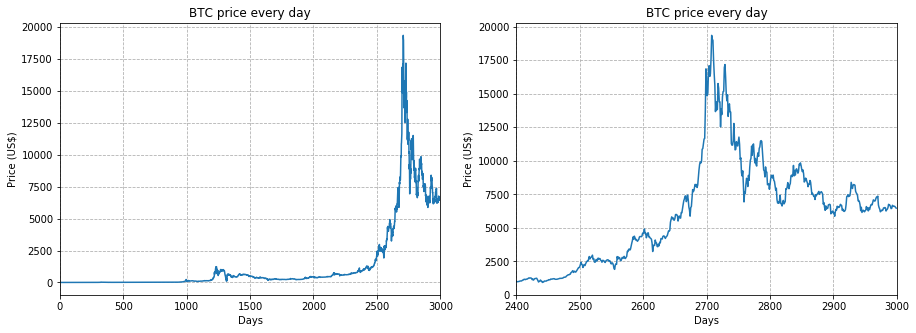

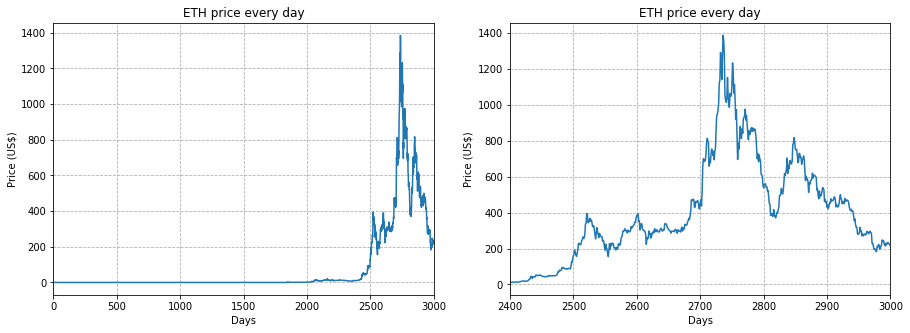

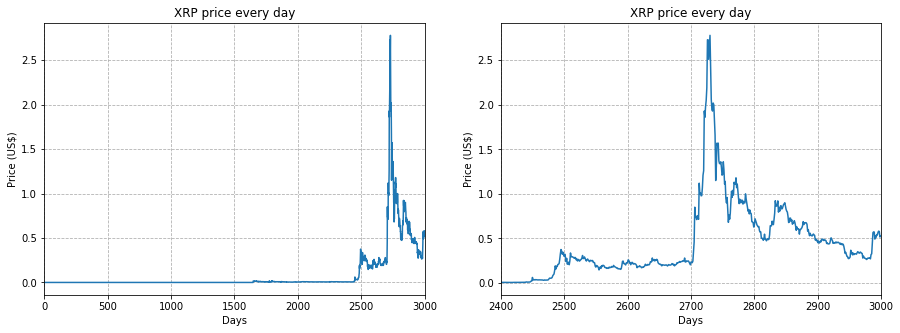

In [2]:
day_data = pd.read_csv('datasets/daily_data.csv')

def time_series_day(data, coin, start):
    data_type = 'Days'
    title = coin + ' price every day'

    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")

    data_window = data.iloc[start:, data.columns.get_loc(coin)]
    
    plt.subplot(1, 2, 2)
    ax = data_window.plot()
    plt.xlim((start, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")

    plt.show()
    
time_series_day(day_data, 'BTC', 2400)
time_series_day(day_data, 'ETH', 2400)
time_series_day(day_data, 'XRP', 2400)


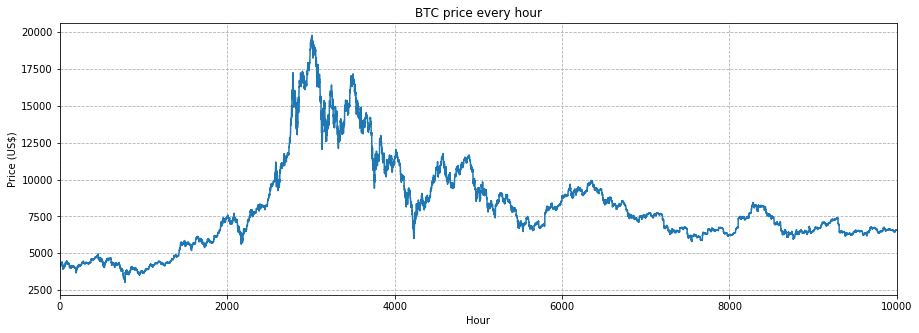

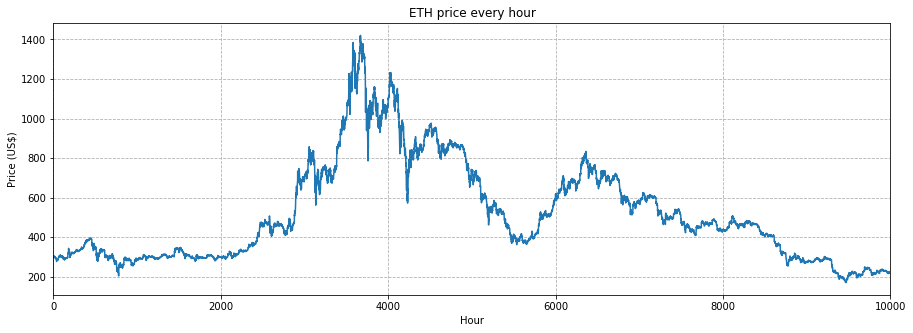

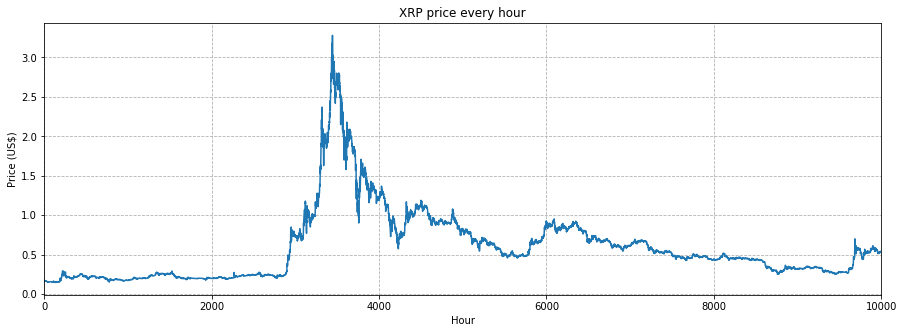

In [3]:
hour_data = pd.read_csv('datasets/hourly_data.csv')

def time_series_hour(data, coin):
    data_type = 'Hour'
    title = coin + ' price every hour'

    plt.figure(figsize=(15,5))
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")
    
time_series_hour(hour_data, 'BTC')
time_series_hour(hour_data, 'ETH')
time_series_hour(hour_data, 'XRP')


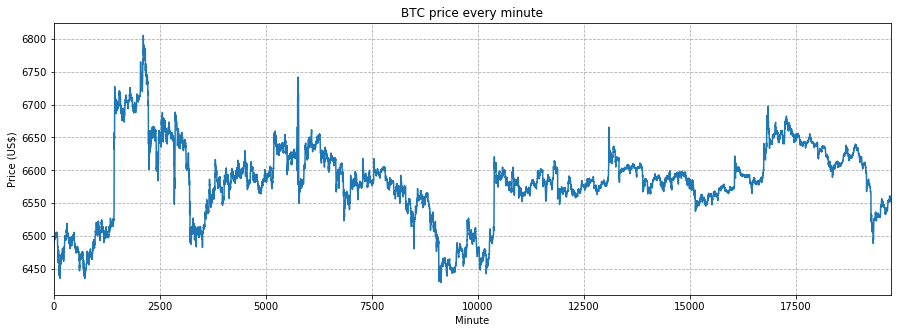

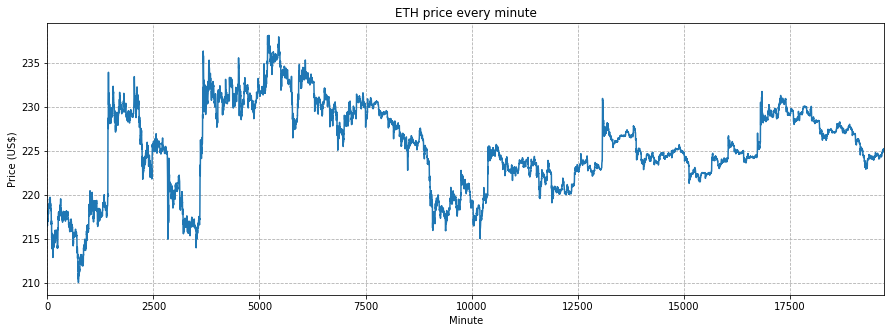

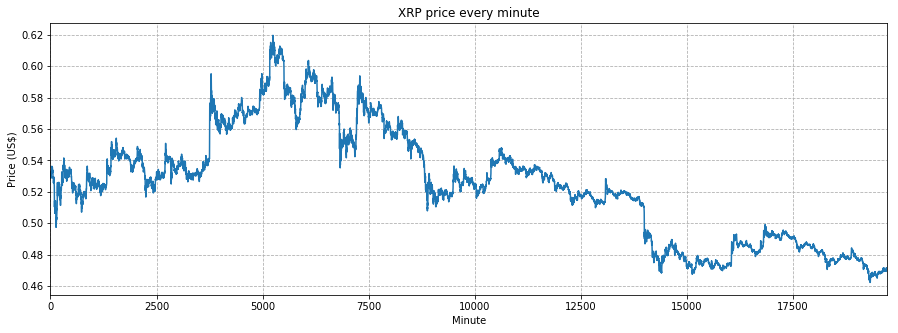

In [4]:
minute_data = pd.read_csv('datasets/minute_data.csv')

def time_series_minute(data, coin):
    data_type = 'Minute'
    title = coin + ' price every minute'

    plt.figure(figsize=(15,5))
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")
    
time_series_minute(minute_data, 'BTC')
time_series_minute(minute_data, 'ETH')
time_series_minute(minute_data, 'XRP')


### Estatísticas

In [5]:
day_data[['BTC', 'ETH', 'XRP']].describe()

,BTC,ETH,XRP
count,3000.000000,3000.000000,3000.000000
mean,1441.687534,82.007592,0.092538
std,2947.189164,203.599170,0.267200
min,0.050500,0.000000,0.000000
25%,11.665000,0.000000,0.000000
50%,289.380000,0.000000,0.000000
75%,740.560000,11.282500,0.008200
max,19345.490000,1385.020000,2.780000


In [6]:
hour_data[['BTC', 'ETH', 'XRP']].describe()

,BTC,ETH,XRP
count,10000.000000,10000.000000,10000.000000
mean,8057.679765,517.751498,0.592293
std,3078.983493,252.437974,0.459661
min,3018.120000,170.370000,0.149200
25%,6349.232500,303.532500,0.246475
50%,7355.205000,458.910000,0.481150
75%,9206.067500,685.760000,0.750200
max,19784.930000,1420.770000,3.280000


In [7]:
minute_data[['BTC', 'ETH', 'XRP']].describe()

,BTC,ETH,XRP
count,19729.000000,19729.000000,19729.000000
mean,6582.460135,225.387756,0.525232
std,57.953303,4.838896,0.035655
min,6429.750000,210.090000,0.462200
25%,6560.000000,222.560000,0.490600
50%,6584.570000,225.230000,0.525300
75%,6615.830000,229.200000,0.547000
max,6805.050000,238.170000,0.619600


### Distribuições

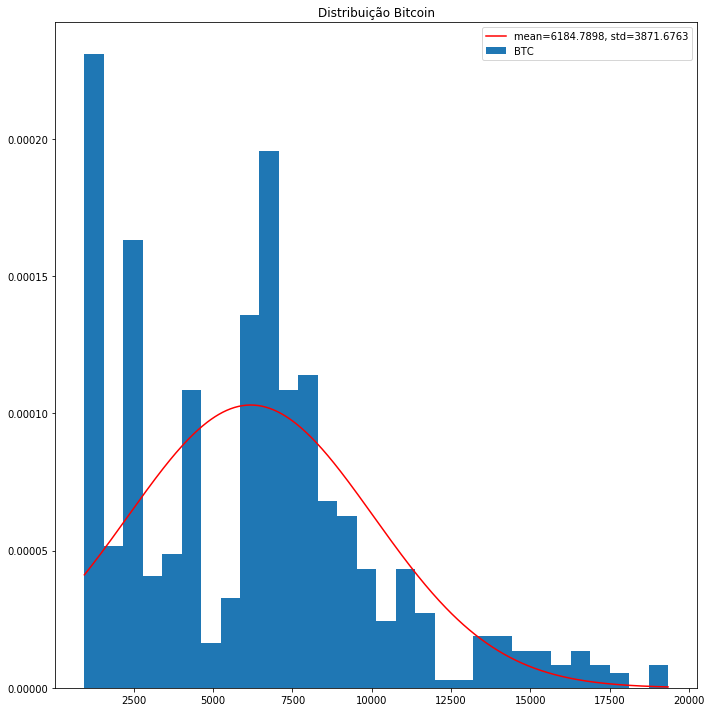

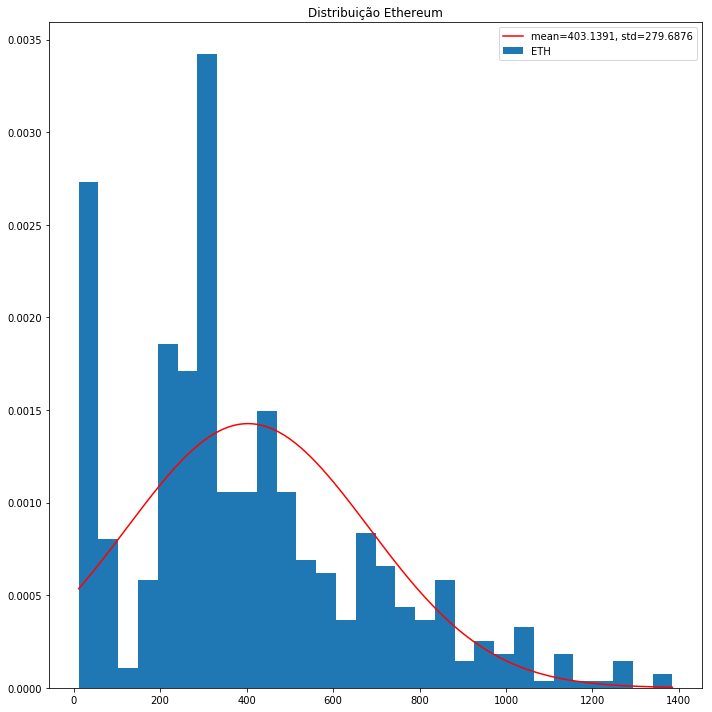

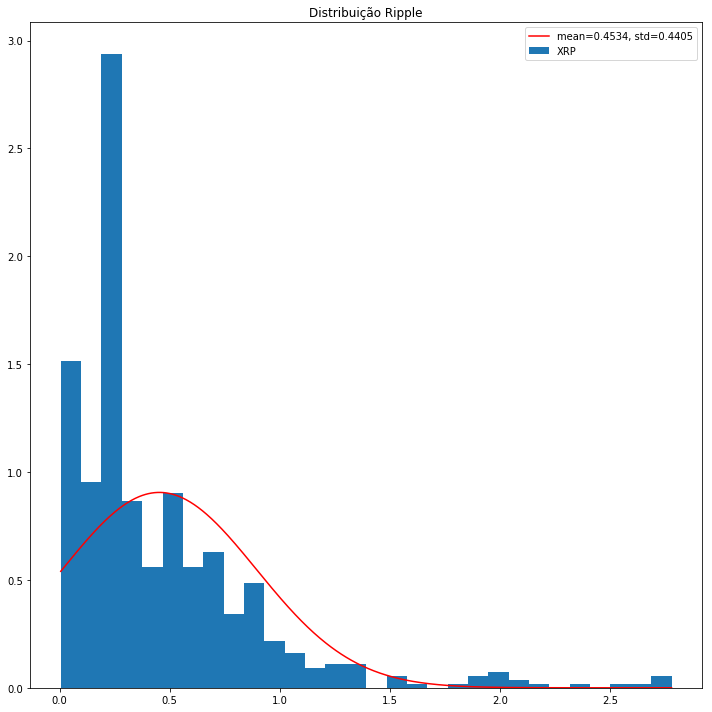

In [8]:
day_data_window = day_data.iloc[2400:]

def plot_dist(values, title):
    x = np.linspace(values.min(), values.max(), len(values))

    loc, scale = stats.norm.fit(values)
    param_density = stats.norm.pdf(x, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f' % (loc, scale)

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(title)
    ax.hist(values, bins=30, normed=True)
    ax.plot(x, param_density, 'r-', label=label)
    ax.legend(loc='best')
    plt.tight_layout()

plot_dist(day_data_window['BTC'], "Distribuição Bitcoin")
plot_dist(day_data_window['ETH'], "Distribuição Ethereum")
plot_dist(day_data_window['XRP'], "Distribuição Ripple")

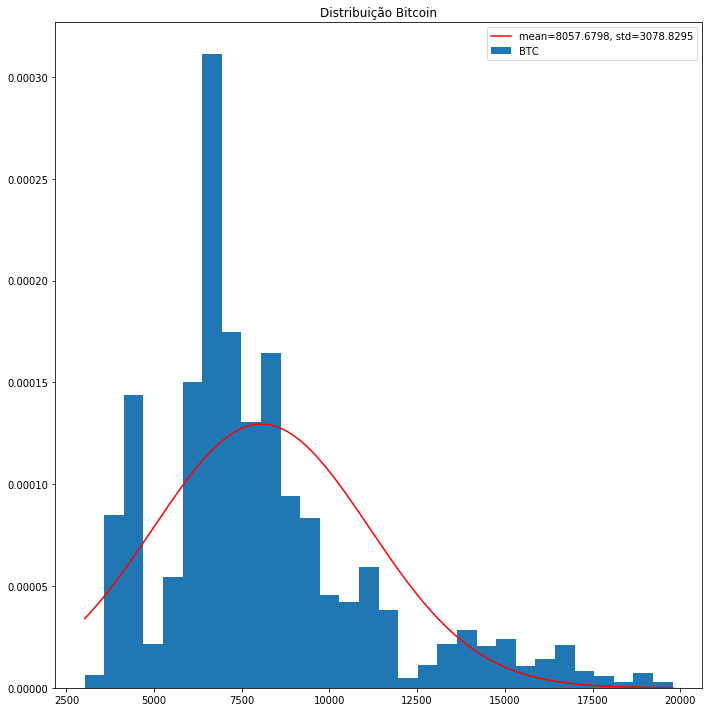

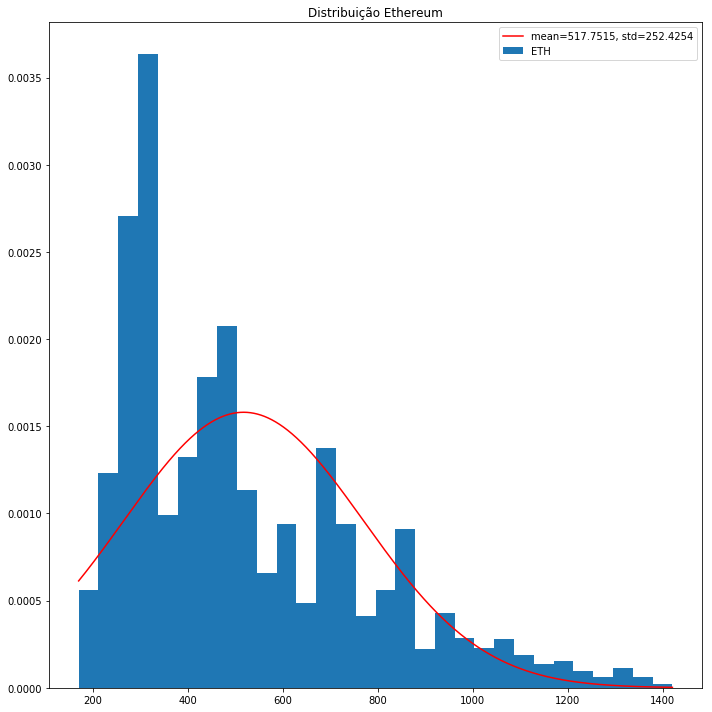

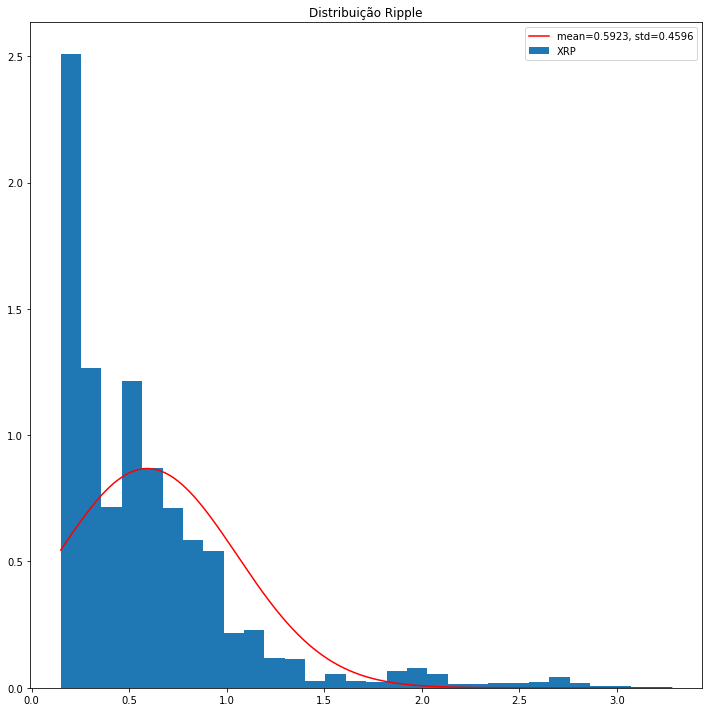

In [9]:
plot_dist(hour_data['BTC'], "Distribuição Bitcoin")
plot_dist(hour_data['ETH'], "Distribuição Ethereum")
plot_dist(hour_data['XRP'], "Distribuição Ripple")

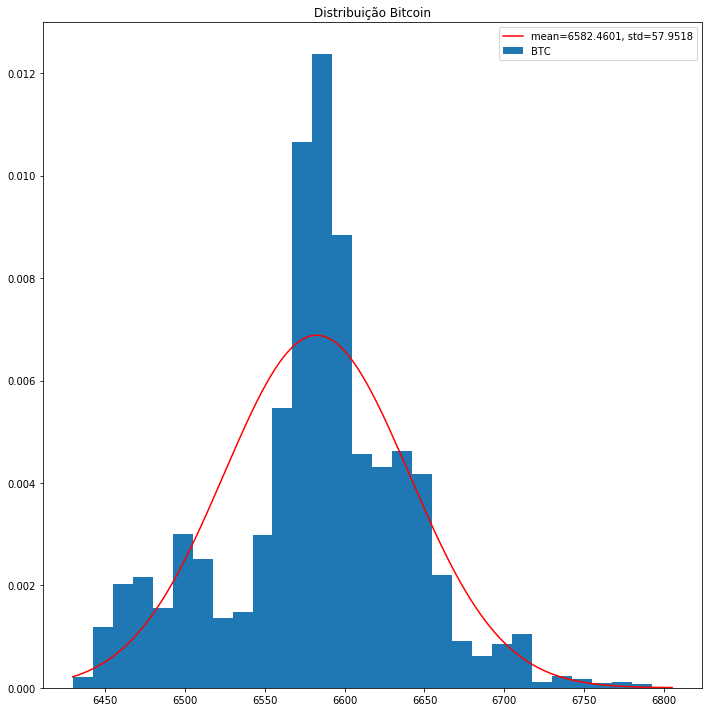

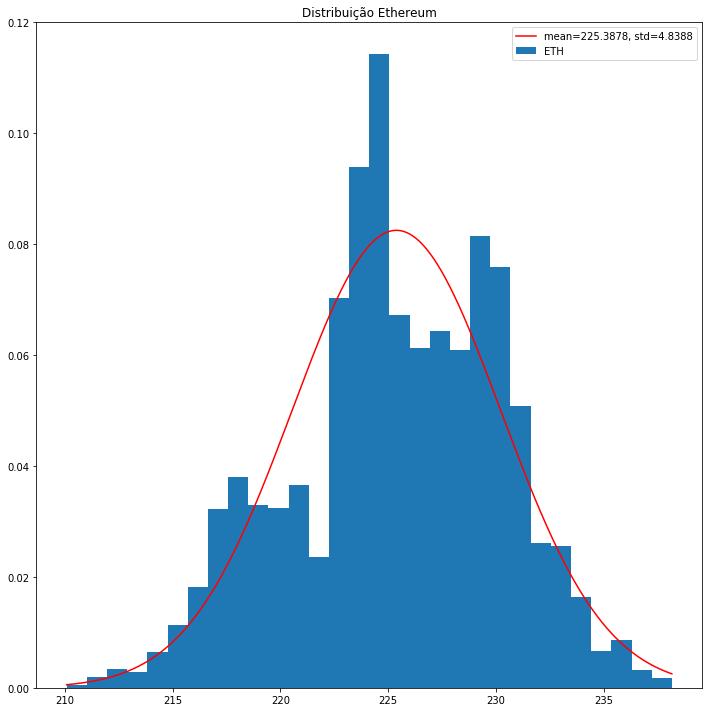

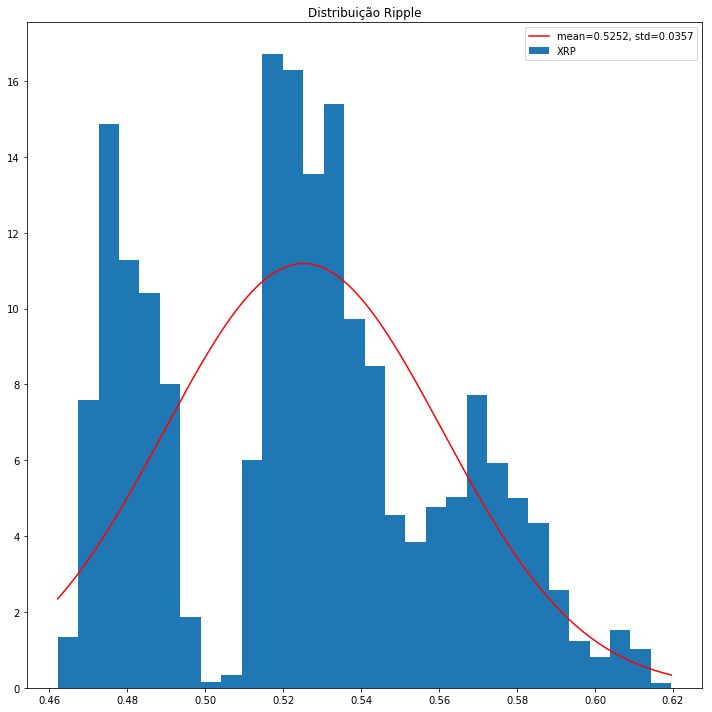

In [10]:
plot_dist(minute_data['BTC'], "Distribuição Bitcoin")
plot_dist(minute_data['ETH'], "Distribuição Ethereum")
plot_dist(minute_data['XRP'], "Distribuição Ripple")

### Mapa de calor

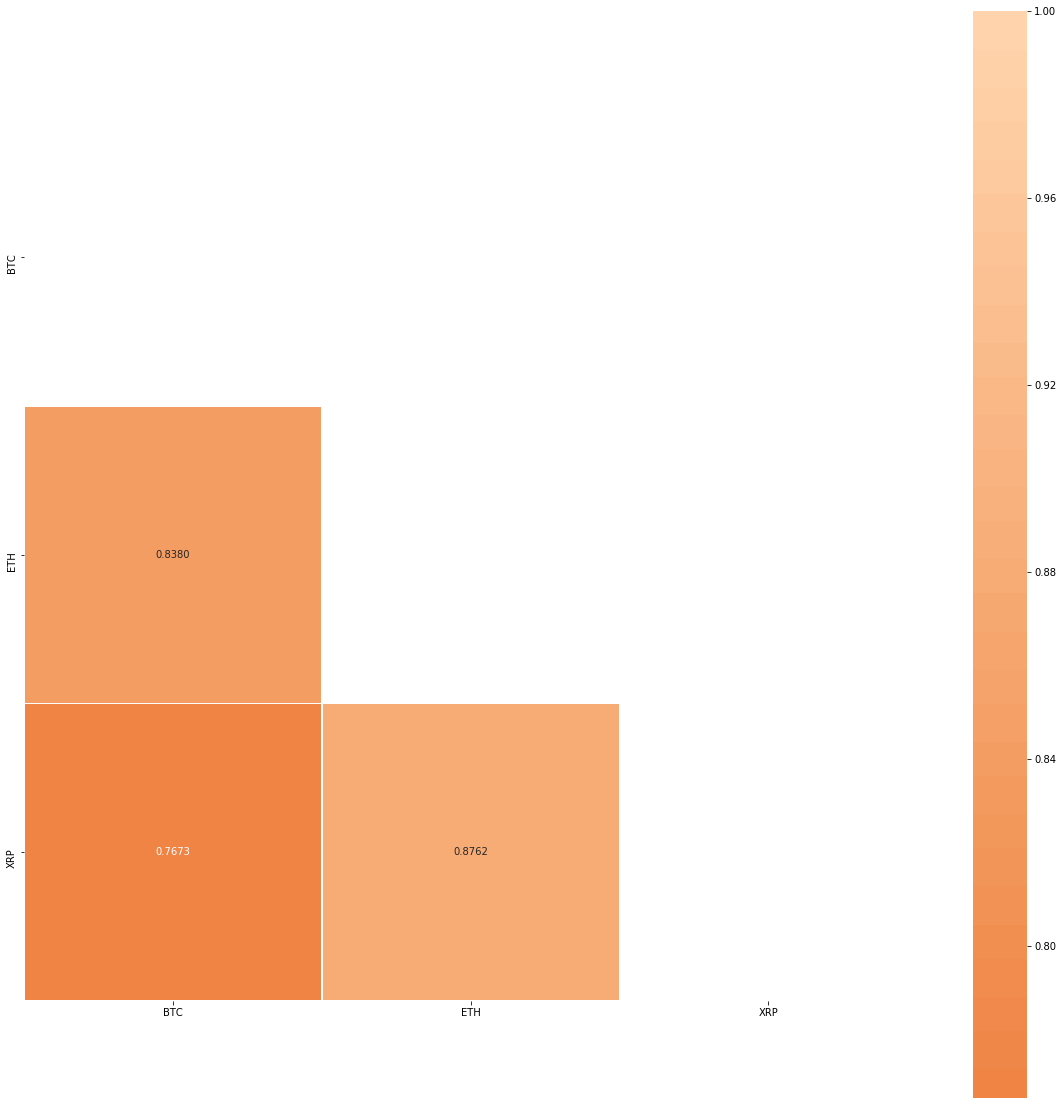

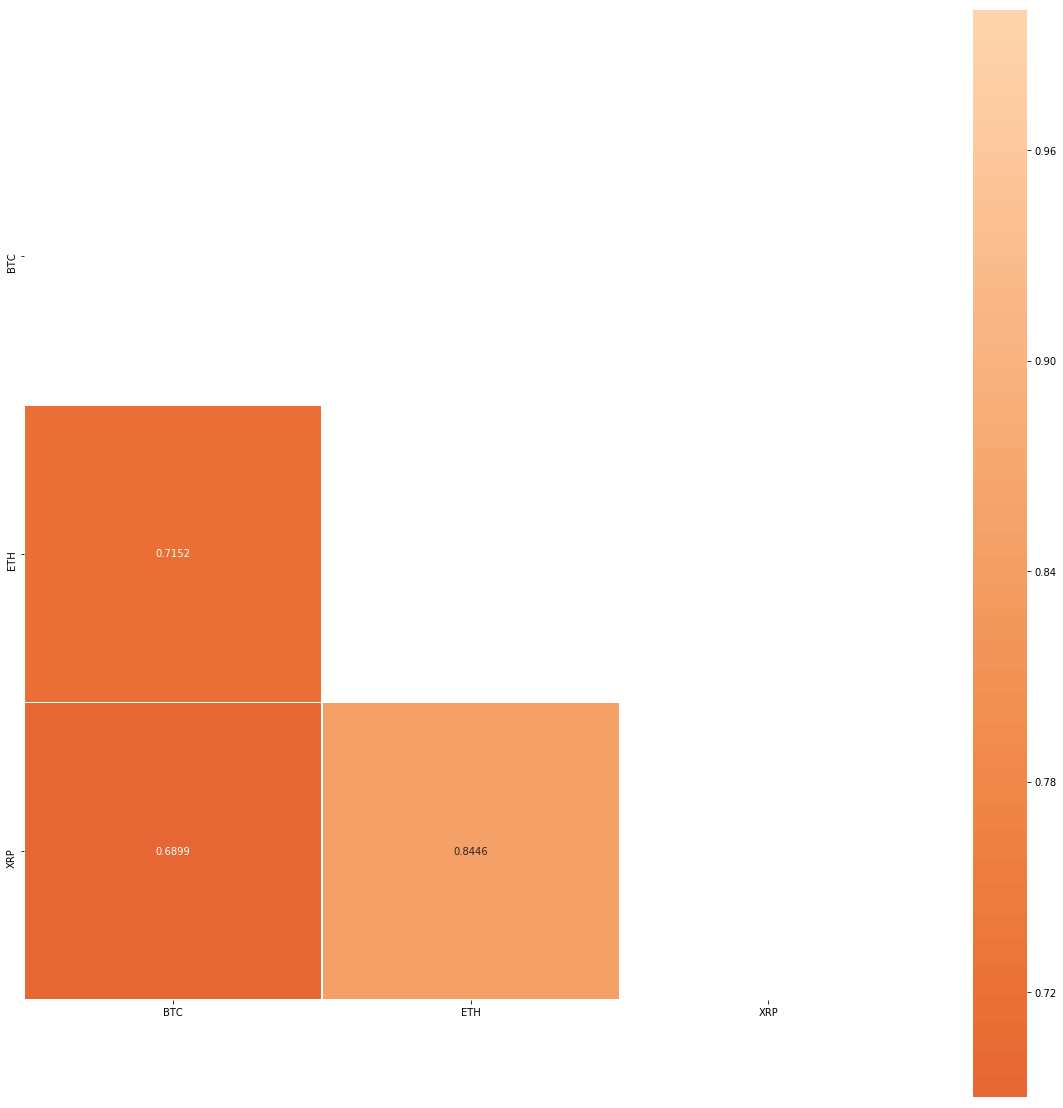

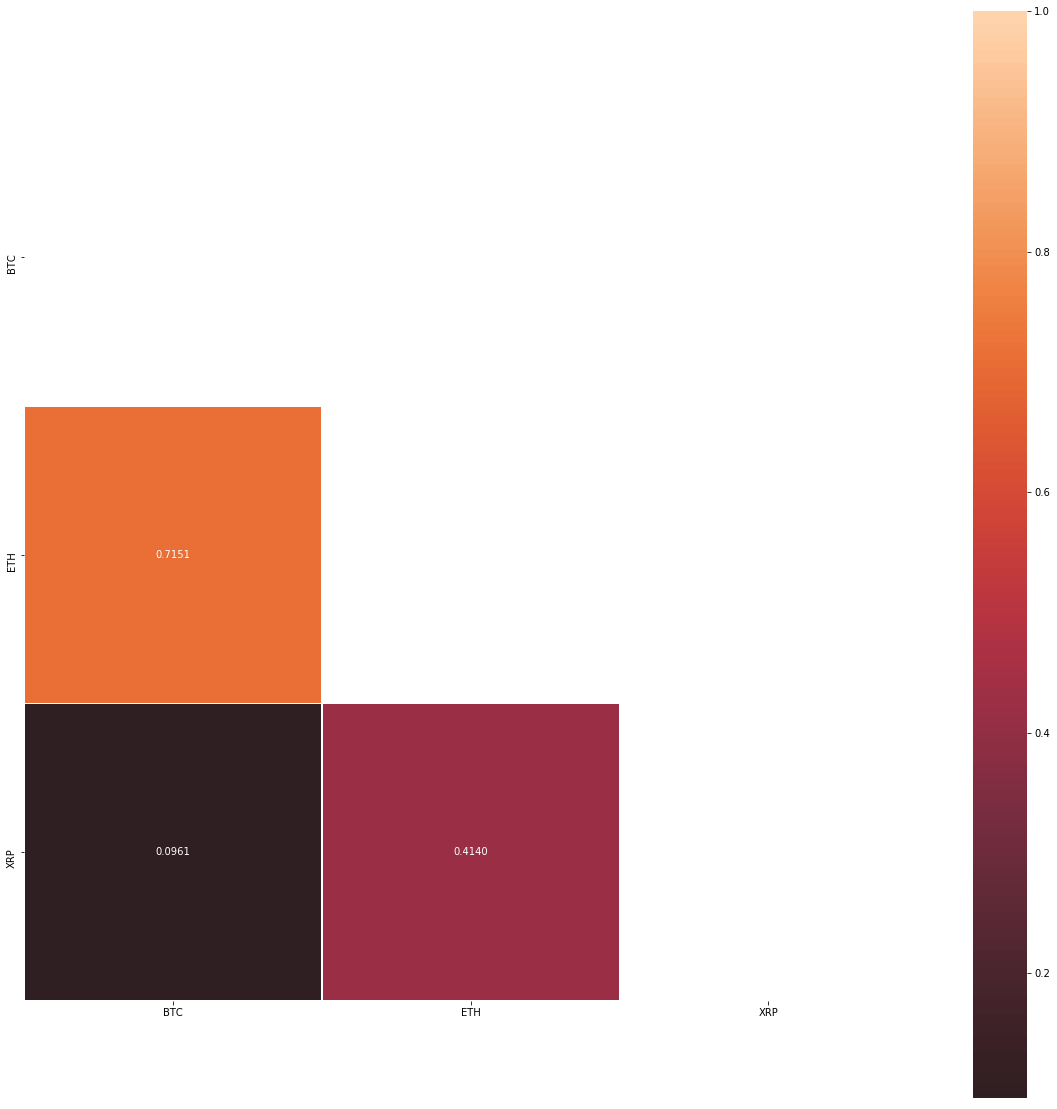

In [11]:
def heatmap(data):
    corr = pd.DataFrame()


    for symbol in ['BTC', 'ETH', 'XRP']:
        corr[f'{symbol}'] = data[symbol]

    corr = corr.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 20))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5);

heatmap(day_data_window)
heatmap(hour_data)
heatmap(minute_data)

### Gráficos violino

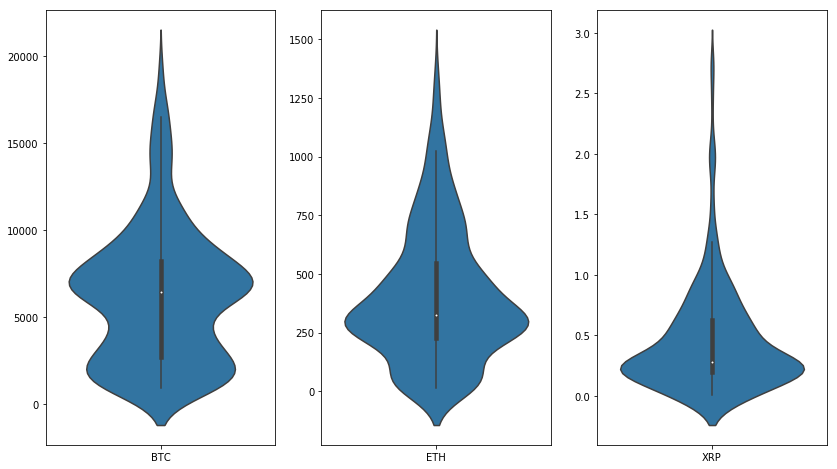

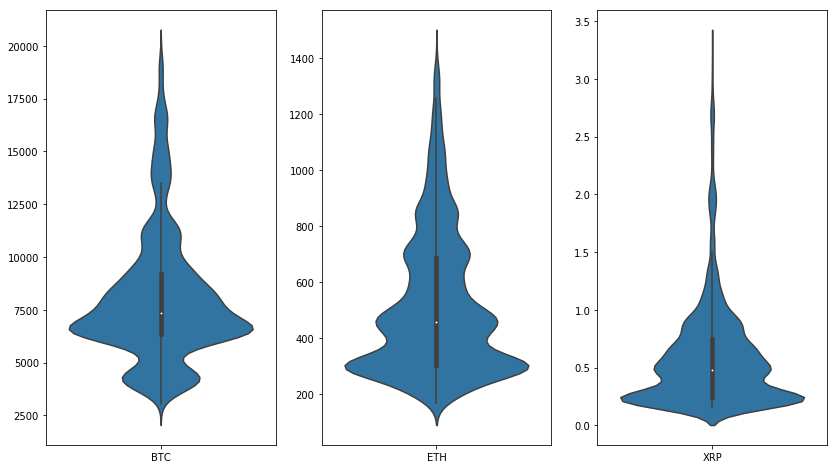

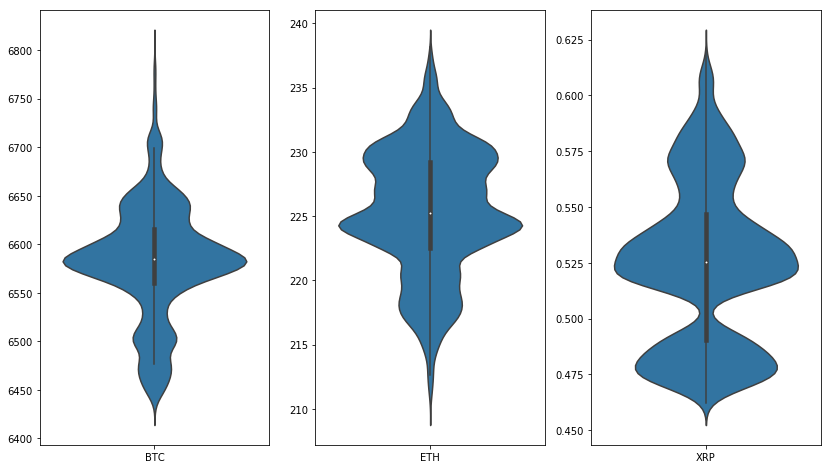

In [12]:
for data in (day_data_window.reset_index(drop=True), hour_data, minute_data):
    plt.figure(figsize=(14,8))
    plt.subplot(1, 3, 1)
    ax = sns.violinplot(data=data['BTC'])
    ax.set_xticklabels(['BTC'])
    plt.subplot(1, 3, 2)
    ax = sns.violinplot(data=data['ETH'])
    ax.set_xticklabels(['ETH'])
    plt.subplot(1, 3, 3)
    ax = sns.violinplot(data=data['XRP'])
    ax.set_xticklabels(['XRP'])


### Gráficos de densidade

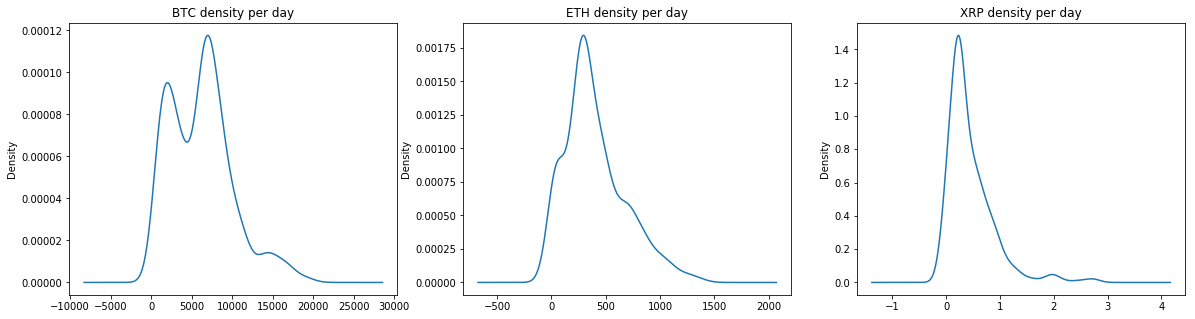

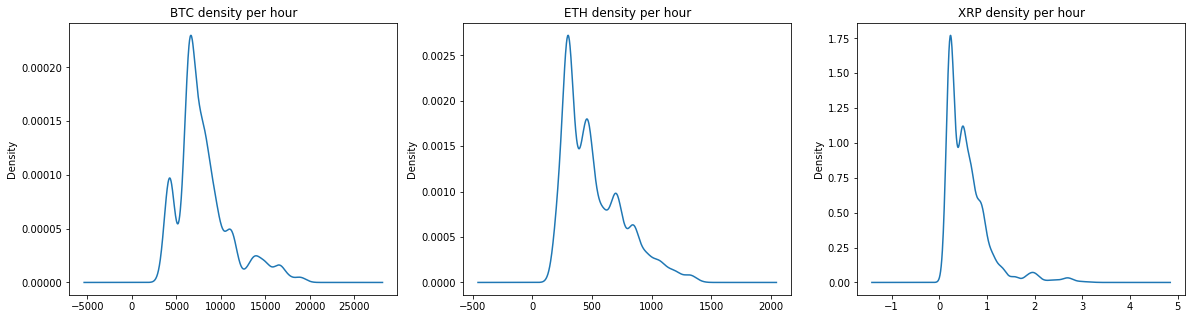

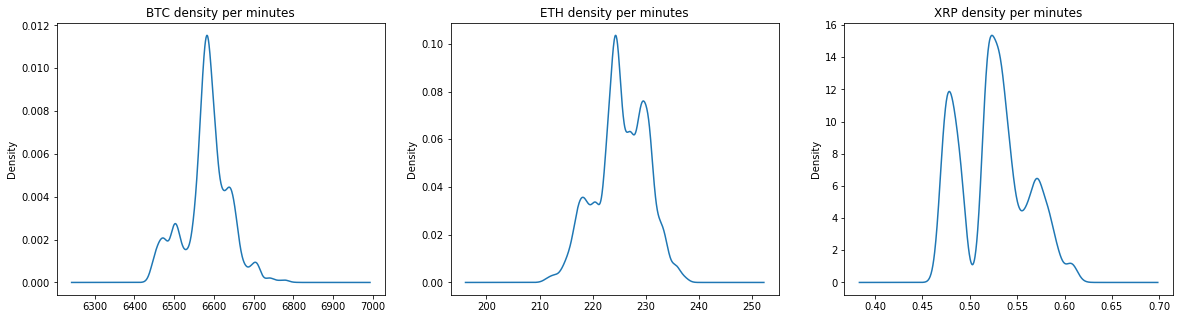

In [13]:
datasets = (day_data_window, hour_data, minute_data)
titles = ("per day", "per hour", "per minutes")

for data, title in zip(datasets, titles):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    plt.title('BTC density ' + title)
    data['BTC'].plot(kind='density')
    plt.subplot(1, 3, 2)
    plt.title('ETH density ' + title)
    data['ETH'].plot(kind='density')
    plt.subplot(1, 3, 3)
    plt.title('XRP density ' + title)
    data['XRP'].plot(kind='density')

### Gráficos candlestick e Heikin-Ashi

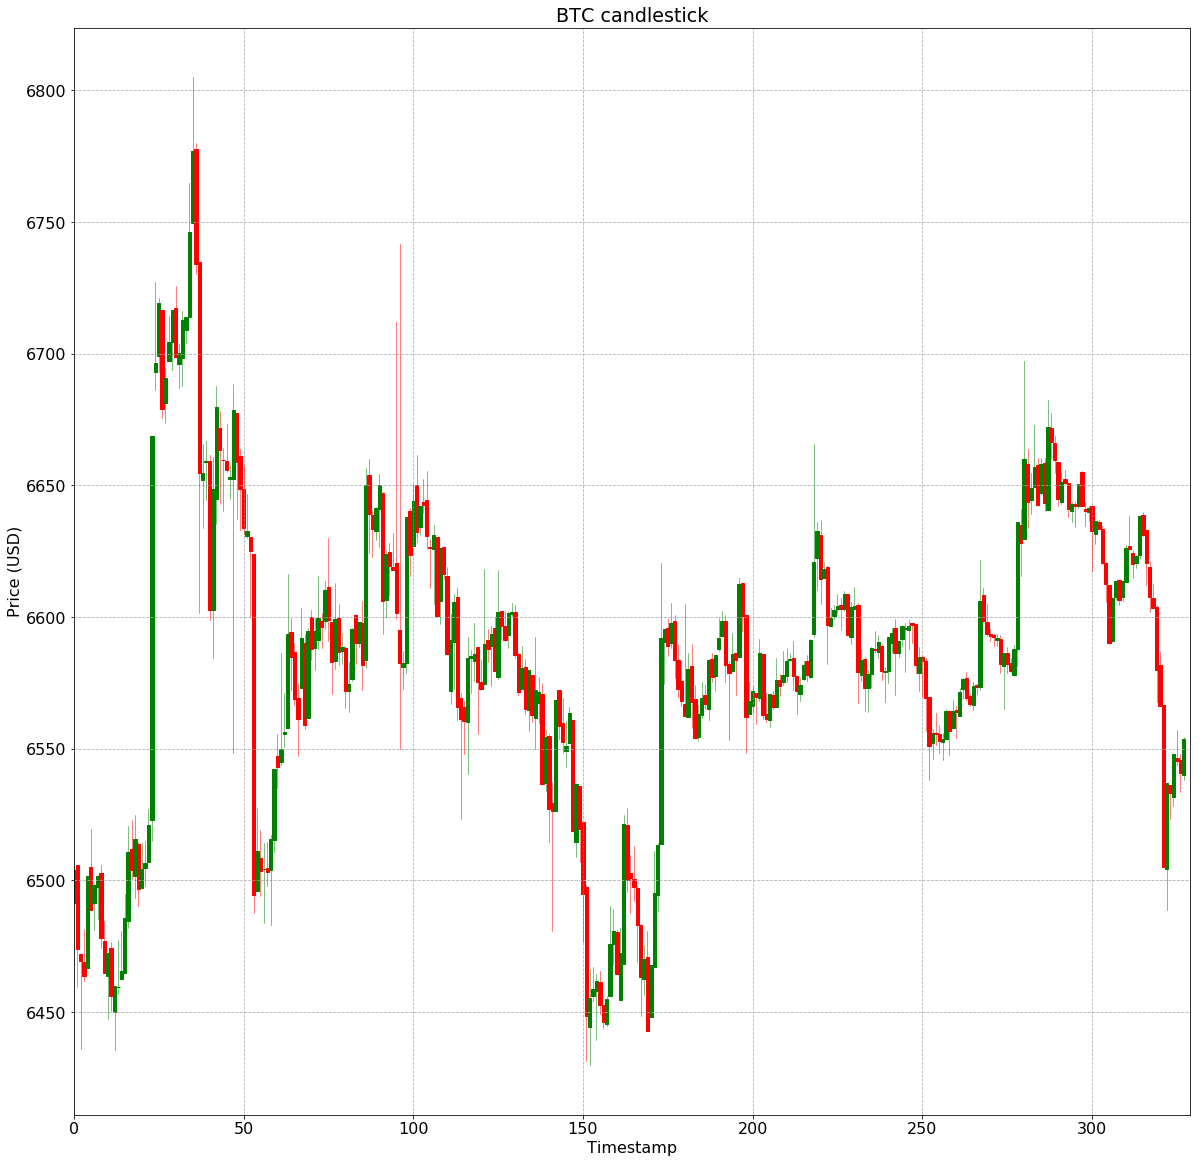

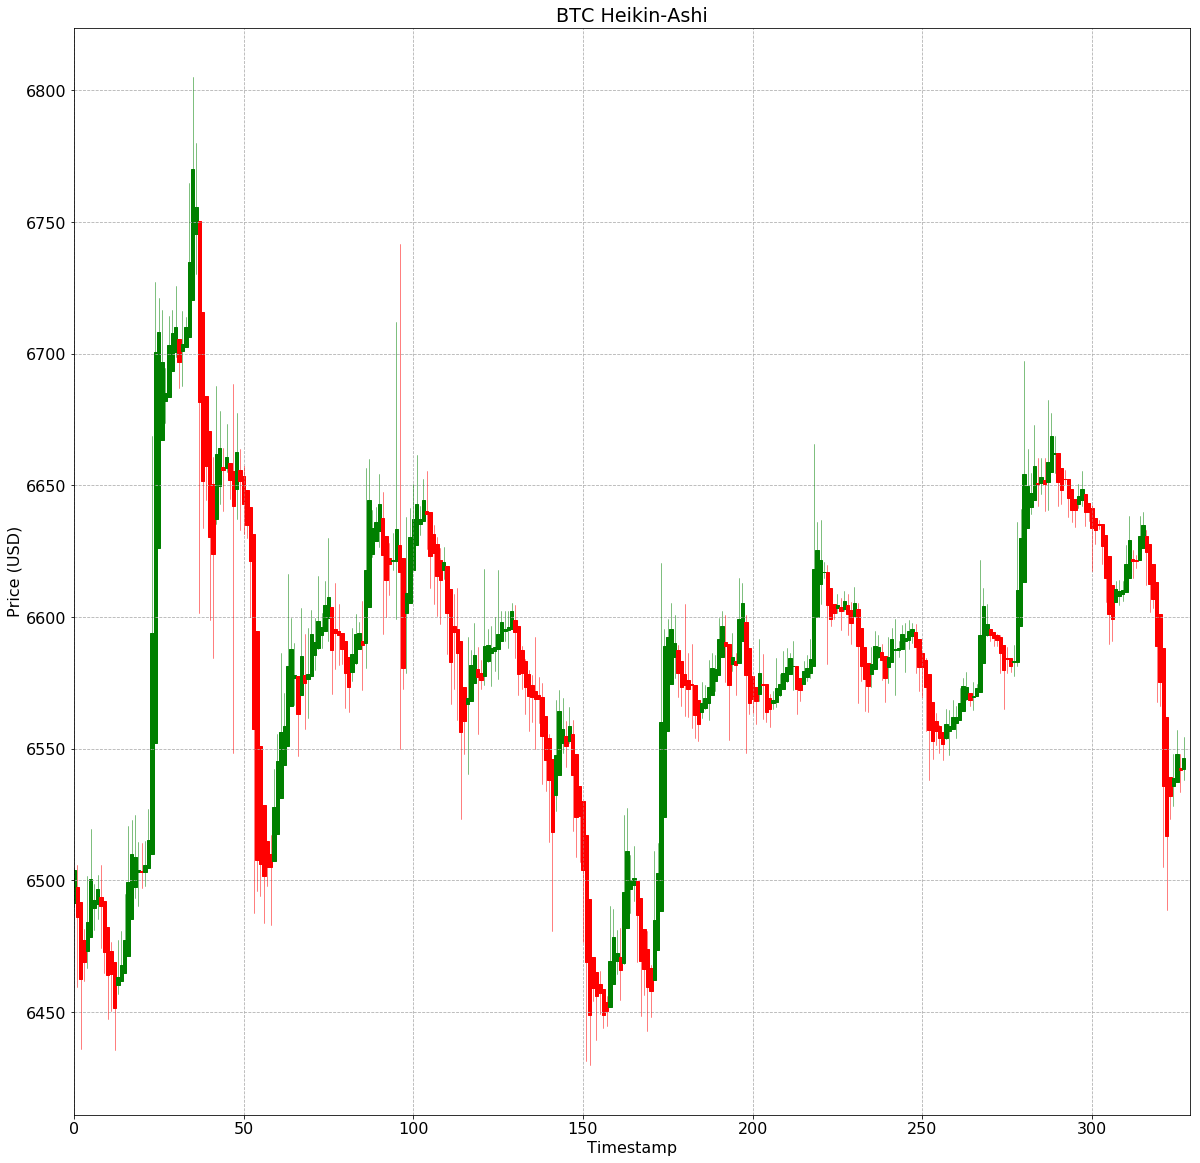

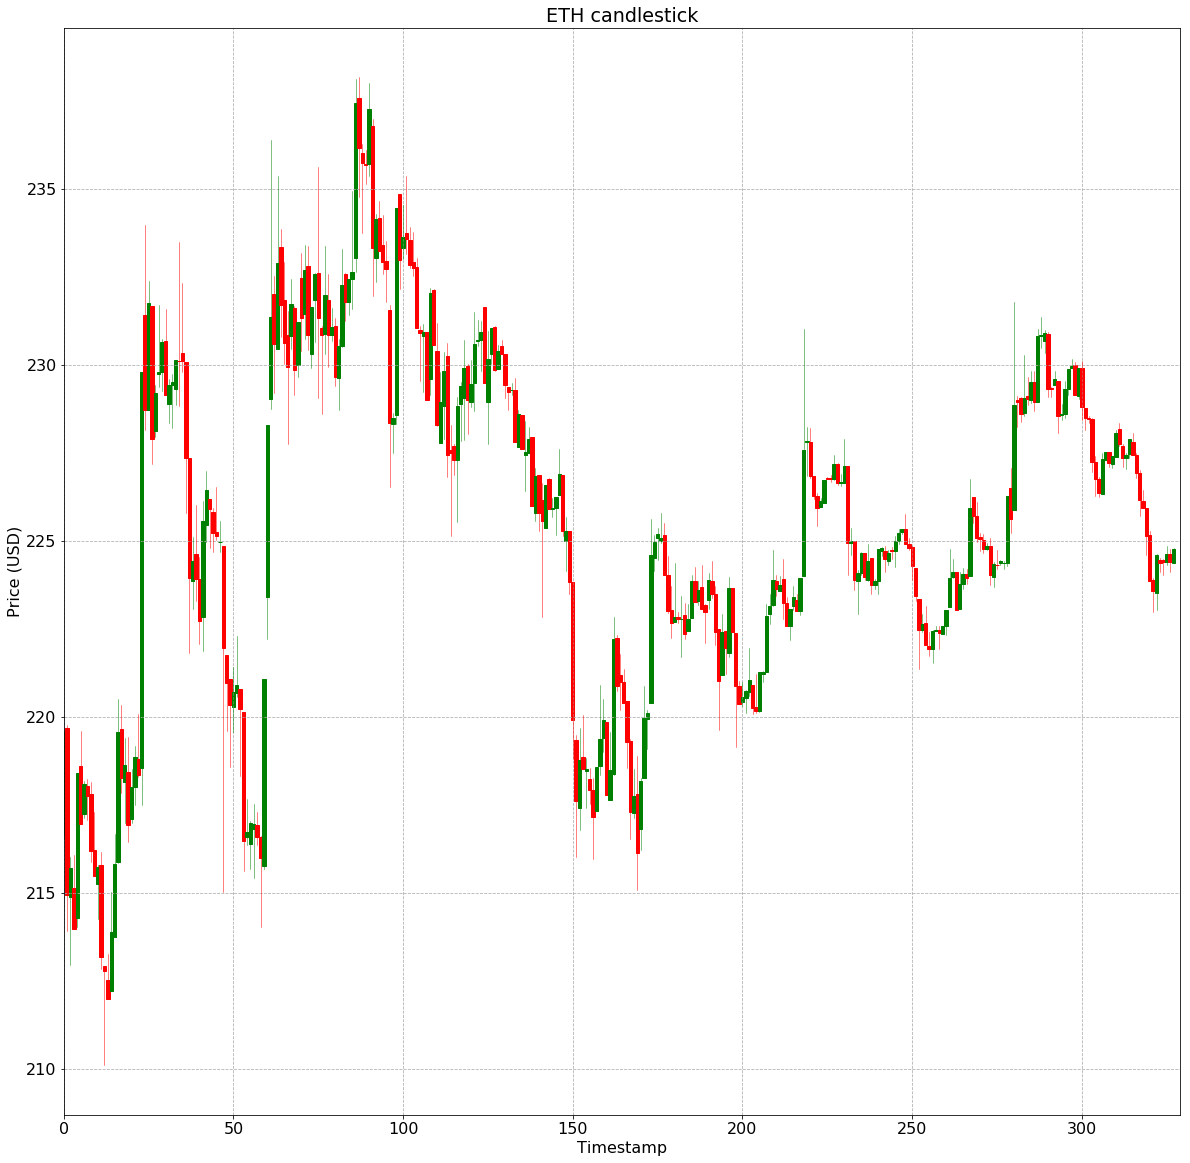

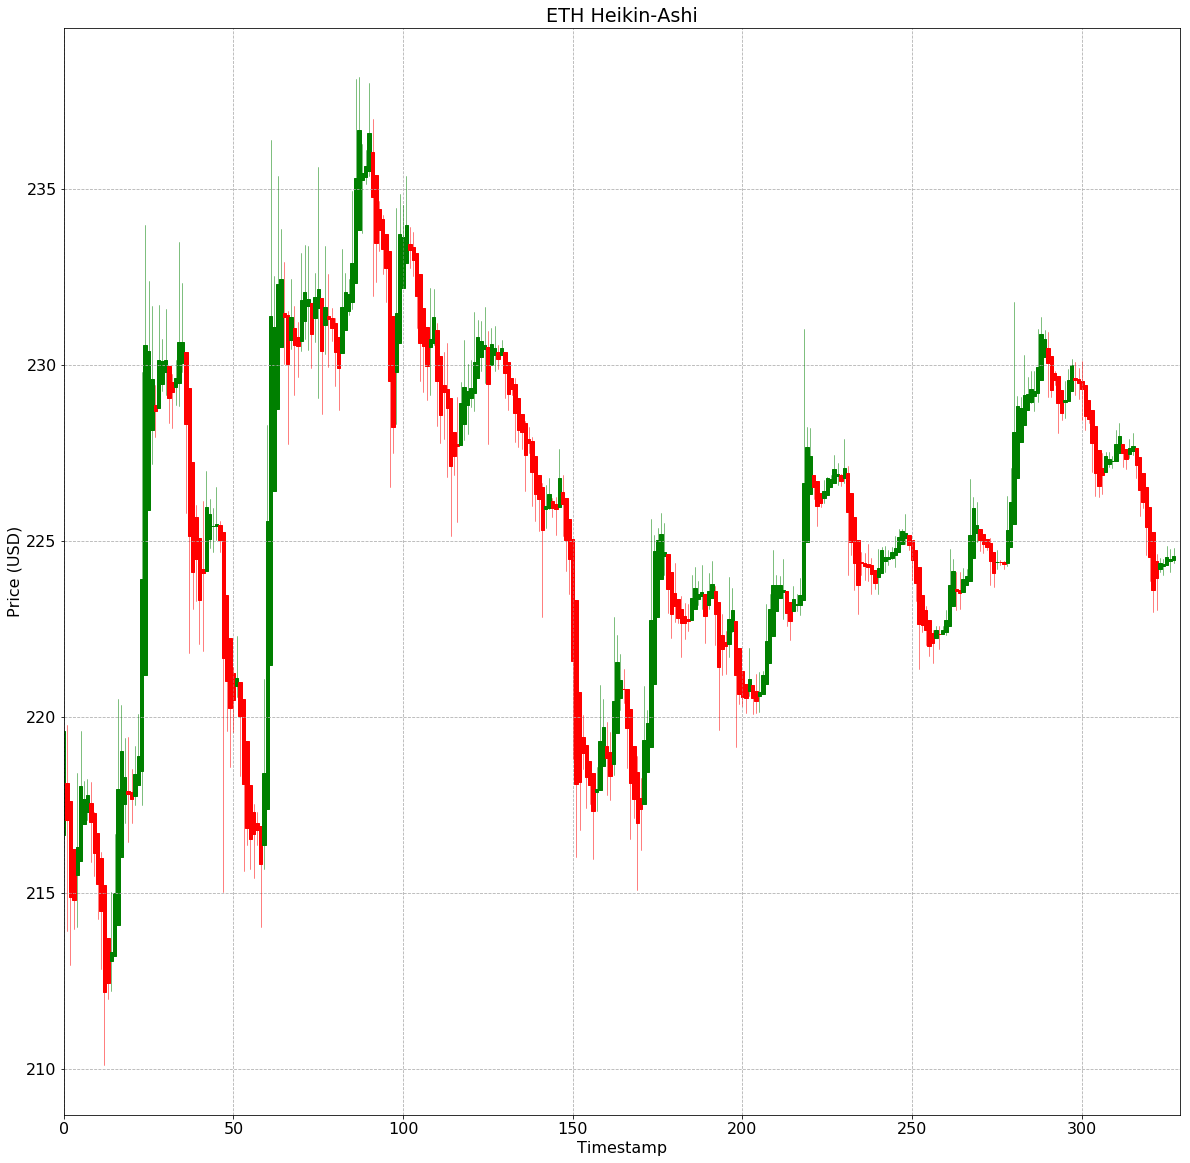

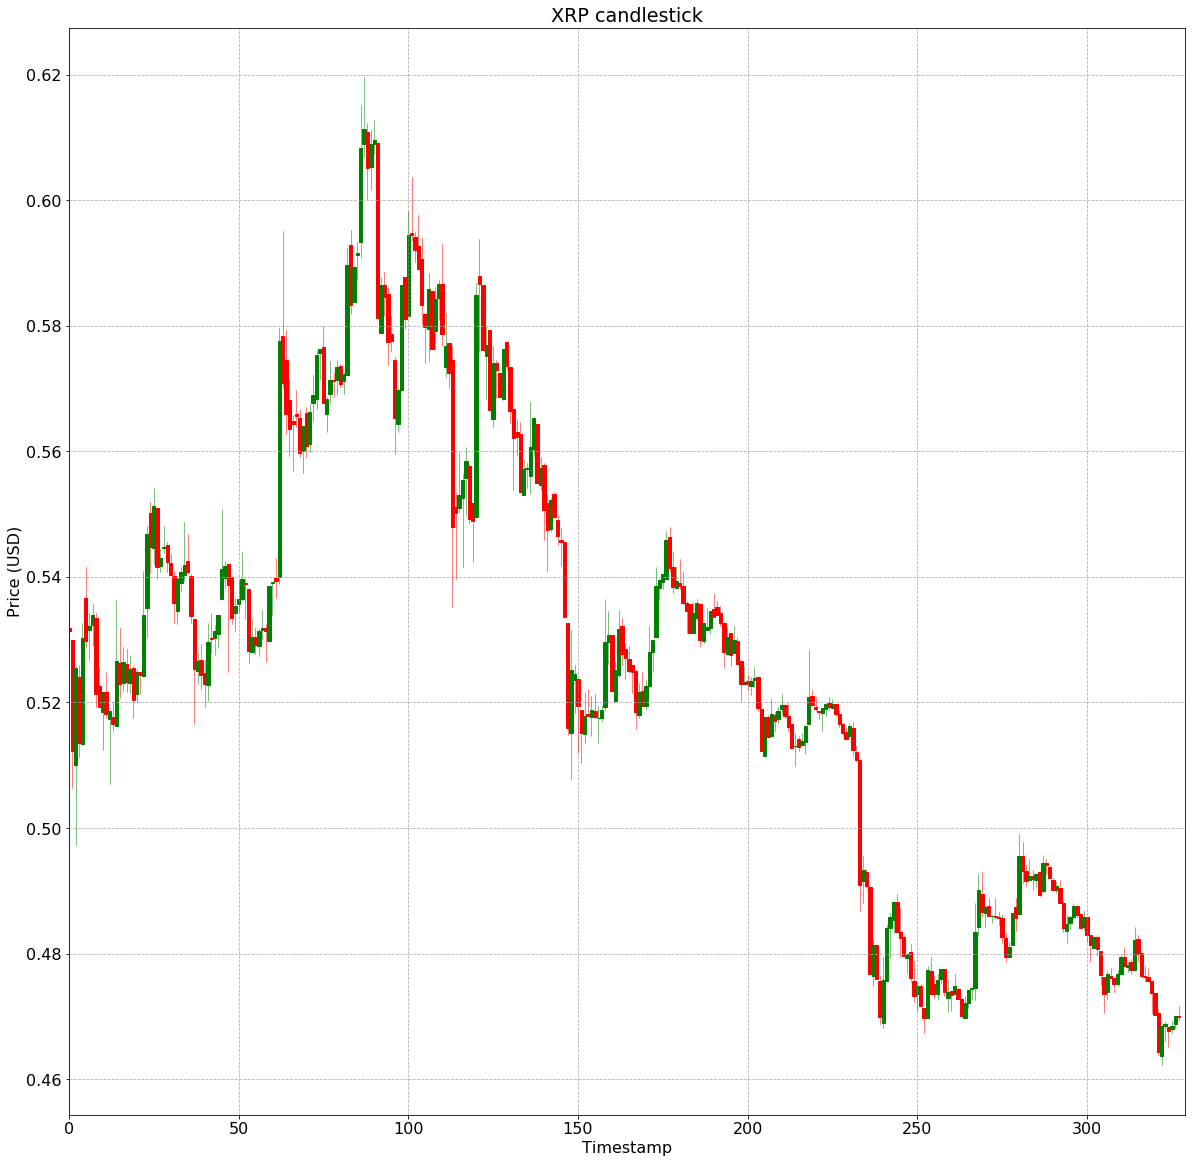

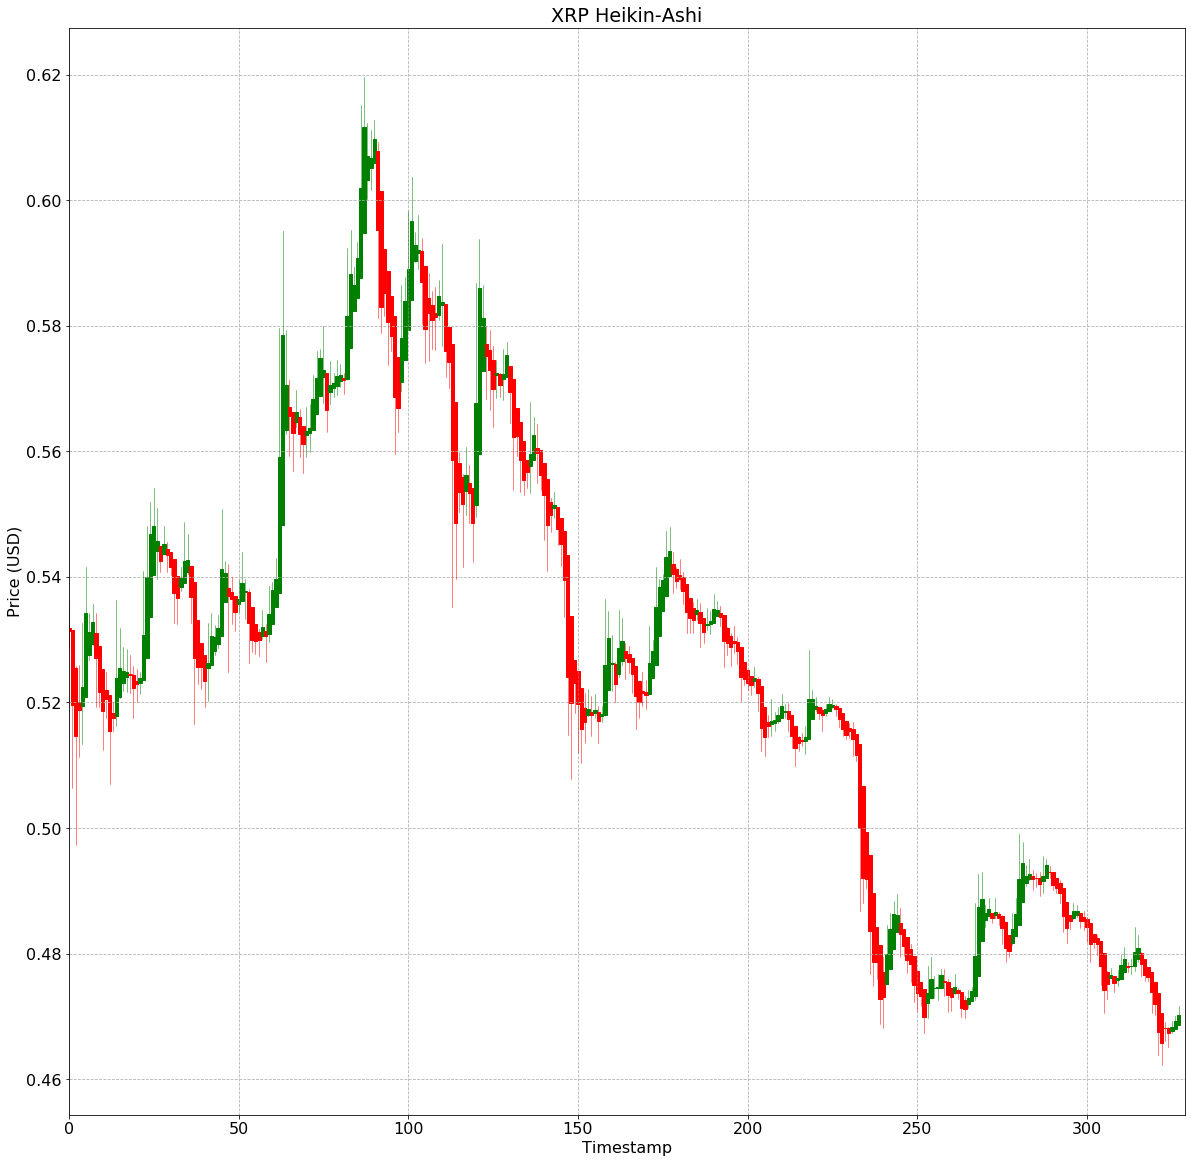

In [14]:
def candles(step, coin): 
    date = []
    popen = []
    high = []
    low = []
    close = []
    indexes = list(range(len(minute_data)))

    matplotlib.rcParams.update({'font.size': 16})
    
    for i in range(0, len(minute_data) - step, step):
        date.append(minute_data.at[i, coin+'_time'])
        popen.append(minute_data.at[i, coin])
        high.append(max(minute_data.iloc[i:i+step, minute_data.columns.get_loc(coin)]))
        low.append(min(minute_data.iloc[i:i+step, minute_data.columns.get_loc(coin)]))
        close.append(minute_data.at[i+step-1, coin])    

    fig, ax = plt.subplots(figsize=(20, 20))       
    candlestick_ohlc(ax, zip(indexes, popen, high, low, close), width=1, colorup='g');
    plt.title(coin + " candlestick")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Price (USD)')
    plt.xlim((0, len(indexes)/step))
    plt.grid(linestyle="dashed")

    hadate = []
    hapopen = []
    hahigh = []
    halow = []
    haclose = []    

    hadate.append(minute_data.at[0, coin+'_time'])
    hapopen.append(minute_data.at[0, coin])
    hahigh.append(max(minute_data.iloc[0:step, minute_data.columns.get_loc(coin)]))
    halow.append(min(minute_data.iloc[0:step, minute_data.columns.get_loc(coin)]))
    haclose.append(minute_data.at[step-1, coin])

    for i in range(1, len(date)):
        hadate.append(date[i])
        haclose.append((popen[i] + high[i] + low[i] + close[i])/4)
        hapopen.append((hapopen[i-1] + haclose[i-1])/2)
        hahigh.append(max(high[i], haclose[i], hapopen[i]))
        halow.append(min(low[i], haclose[i], hapopen[i]))


    fig, ax = plt.subplots(figsize=(20, 20))    
    candlestick_ohlc(ax, zip(indexes, hapopen, hahigh, halow, haclose), width=1, colorup='g');
    plt.title(coin + " Heikin-Ashi")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Price (USD)')
    plt.xlim((0, len(indexes)/step))
    plt.grid(linestyle="dashed")
    matplotlib.rcParams.update({'font.size': 12})
    
candles(60, 'BTC')
candles(60, 'ETH')
candles(60, 'XRP')